In [1]:
import utils_general
import utils_CMIP
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import xarray as xr
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

# Experiment 5: CMIP6
### Model: MPI-ESM1-2-LR

In [15]:
path_to_cmip6_data = '/Volumes/PRO-G40/data/raw/CMIP6'
model = 'MPI-ESM1-2-LR'
realization = 'r1i1p1f1'
piCtrl = 'piControl'
experiment = 'ssp585'

rzs = [f'r{i}i1p1f1' for i in range(10,30)]
rzs.append('r1i1p1f1')
rzs.append('r2i1p1f1')

ERF_vars = ['rlut','rsdt','rsut']

spatial_res = '250_km'
temporal_res = 'mon'

### Import piControl data

In [6]:
tas_piCtrl_ds_path = f'{path_to_cmip6_data}/{model}/{realization}/{piCtrl}/tas/{spatial_res}/{temporal_res}/*/*.nc'
tas_global_climatology_ds = utils_CMIP.import_calc_climatology(tas_piCtrl_ds_path, 'tas', global_mean=True)

rlut_piCtrl_ds_path = f'{path_to_cmip6_data}/{model}/{realization}/{piCtrl}/rlut/{spatial_res}/{temporal_res}/*/*.nc'
rlut_global_climatology_ds = utils_CMIP.import_calc_climatology(rlut_piCtrl_ds_path, 'rlut', global_mean=True)

rsdt_piCtrl_ds_path = f'{path_to_cmip6_data}/{model}/{realization}/{piCtrl}/rsdt/{spatial_res}/{temporal_res}/*/*.nc'
rsdt_global_climatology_ds = utils_CMIP.import_calc_climatology(rsdt_piCtrl_ds_path, 'rsdt', global_mean=True)

rsut_piCtrl_ds_path = f'{path_to_cmip6_data}/{model}/{realization}/{piCtrl}/rsut/{spatial_res}/{temporal_res}/*/*.nc'
rsut_global_climatology_ds = utils_CMIP.import_calc_climatology(rsut_piCtrl_ds_path, 'rsut', global_mean=True)

### Import 1pctCO2 data

In [3]:
tas_1pct_ds_path = f'{path_to_cmip6_data}/{model}/{realization}/{experiment}/tas/{spatial_res}/{temporal_res}/*/*.nc'
tas_global_1pct_annual_ds = utils_CMIP.import_annual(tas_1pct_ds_path, 'tas', global_mean=True)

In [7]:
tas_1pct_ds_path = f'{path_to_cmip6_data}/{model}/{realization}/{experiment}/tas/{spatial_res}/{temporal_res}/*/*.nc'
tas_global_1pct_annual_ds = utils_CMIP.import_annual(tas_1pct_ds_path, 'tas', global_mean=True)

rlut_1pct_ds_path = f'{path_to_cmip6_data}/{model}/{realization}/{experiment}/rlut/{spatial_res}/{temporal_res}/*/*.nc'
rlut_global_1pct_annual_ds = utils_CMIP.import_annual(rlut_1pct_ds_path, 'rlut', global_mean=True)

rsdt_1pct_ds_path = f'{path_to_cmip6_data}/{model}/{realization}/{experiment}/rsdt/{spatial_res}/{temporal_res}/*/*.nc'
rsdt_global_1pct_annual_ds = utils_CMIP.import_annual(rsdt_1pct_ds_path, 'rsdt', global_mean=True)

rsut_1pct_ds_path = f'{path_to_cmip6_data}/{model}/{realization}/{experiment}/rsut/{spatial_res}/{temporal_res}/*/*.nc'
rsut_global_1pct_annual_ds = utils_CMIP.import_annual(rsut_1pct_ds_path, 'rsut', global_mean=True)

### Calculate ERF

In [8]:
lam = 1.20
ERF_climatology_ds = utils_CMIP.calc_ERF(tas_global_climatology_ds, rlut_global_climatology_ds,
                                         rsdt_global_climatology_ds, rsut_global_climatology_ds, lam)

ERF_1pct_global_annual_ds = utils_CMIP.calc_ERF(tas_global_1pct_annual_ds, rlut_global_1pct_annual_ds,
                                                rsdt_global_1pct_annual_ds, rsut_global_1pct_annual_ds, lam)

### Calculate anomalies

In [9]:
tas_1pct_global_anomaly_1pct_annual_ds = tas_global_1pct_annual_ds - tas_global_climatology_ds
ERF_1pct_global_anomaly_1pct_annual_ds = ERF_1pct_global_annual_ds - ERF_climatology_ds

In [22]:
np.mean(all_rzs,axis=0)

array([287.72909722, 287.70574511, 287.6566765 , 287.75473593,
       287.7744691 , 287.66913287, 287.77129819, 287.94370397,
       287.8774112 , 287.78911323, 287.92319109, 288.01872774,
       288.05585007, 288.09277959, 287.96620854, 287.9800081 ,
       288.09962999, 288.2204112 , 288.15842888, 288.12284148,
       288.16505467, 288.27627933, 288.26655044, 288.20183297,
       288.41252053, 288.5584386 , 288.31713788, 288.17954695,
       288.35619487, 288.452428  , 288.45146772, 288.68909358,
       288.71722903, 288.8252016 , 288.60270135, 288.69178616,
       288.81183695, 288.66629083, 288.70130222, 288.78384278,
       288.91842252, 289.05173342, 289.01243916, 289.03105562,
       289.16014547, 289.2485103 , 289.35498121, 289.3285385 ,
       289.34919217, 289.29272854, 289.40327168, 289.51033545,
       289.56409389, 289.57083135, 289.59887806, 289.64928172,
       289.68452195, 289.7130817 , 289.73593104, 289.80710602,
       289.98019078, 289.92776836, 289.88656587, 290.01

In [23]:
st_dev = np.zeros(len(rzs))
all_rzs = []
for i, r in enumerate(rzs):
  print(r)
  tas_1pct_ds_path = f'{path_to_cmip6_data}/{model}/{r}/{experiment}/tas/{spatial_res}/{temporal_res}/*/*.nc'
  tas_global_1pct_annual_ds = utils_CMIP.import_annual(tas_1pct_ds_path, 'tas', global_mean=True)
  all_rzs.append(tas_global_1pct_annual_ds.values)
  avg = np.mean(all_rzs,axis=0)
  st_dev[i] = np.std(avg)

r10i1p1f1
r11i1p1f1
r12i1p1f1
r13i1p1f1
r14i1p1f1
r15i1p1f1
r16i1p1f1
r17i1p1f1
r18i1p1f1
r19i1p1f1
r20i1p1f1
r21i1p1f1
r22i1p1f1
r23i1p1f1
r24i1p1f1
r25i1p1f1
r26i1p1f1
r27i1p1f1
r28i1p1f1
r29i1p1f1
r1i1p1f1
r2i1p1f1


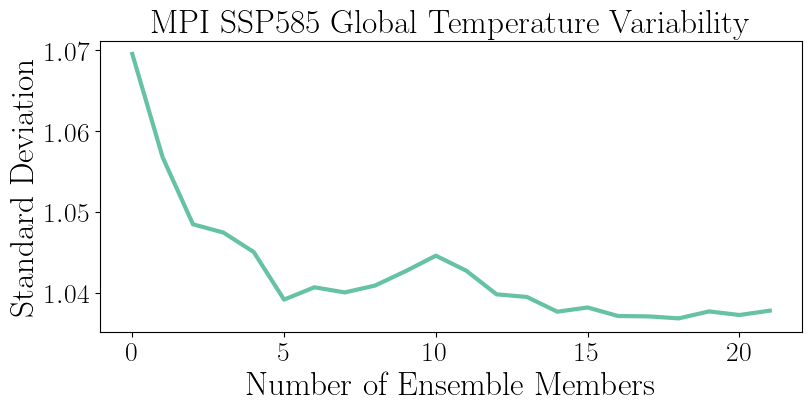

In [27]:
fig, ax = plt.subplots(figsize=(8,4), constrained_layout=True)
ax.plot(np.arange(len(rzs)),st_dev,lw=3,c=utils_general.brewer2_light(0))
ax.set_title('MPI SSP585 Global Temperature Variability',fontsize=24)
ax.set_ylabel('Standard Deviation',fontsize=24)
ax.set_xlabel('Number of Ensemble Members',fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)

plt.savefig('CMIP_variability.png',dpi=500)

<xarray.DataArray ()>
array(1.55685841)

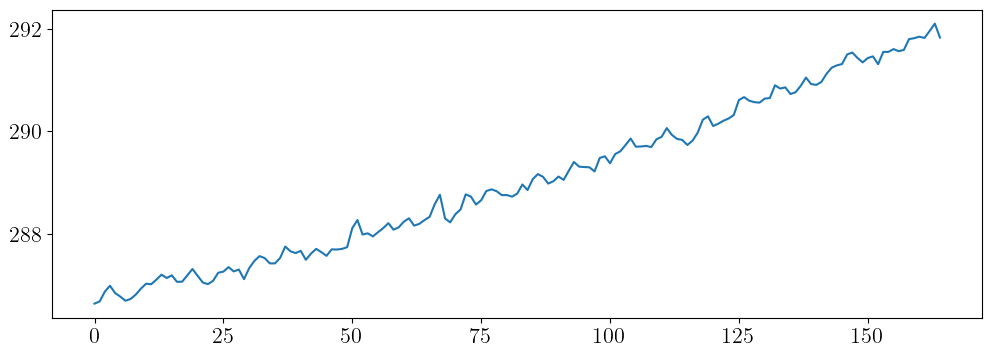

In [5]:
plt.plot(tas_global_1pct_annual_ds)
np.std(tas_global_1pct_annual_ds)
#plt.plot(ERF_1pct_global_anomaly_1pct_annual_ds)

In [11]:
T = tas_1pct_global_anomaly_1pct_annual_ds.values
F = ERF_1pct_global_anomaly_1pct_annual_ds.values
g, a = utils_general.calc_modes(T)
t = tas_1pct_global_anomaly_1pct_annual_ds.time.values

## Global Data

#### Method 1: Using 4xCO2 experiment as impulse?

#### Method 2: Direct inference of L from a dataset

5.143247890253341


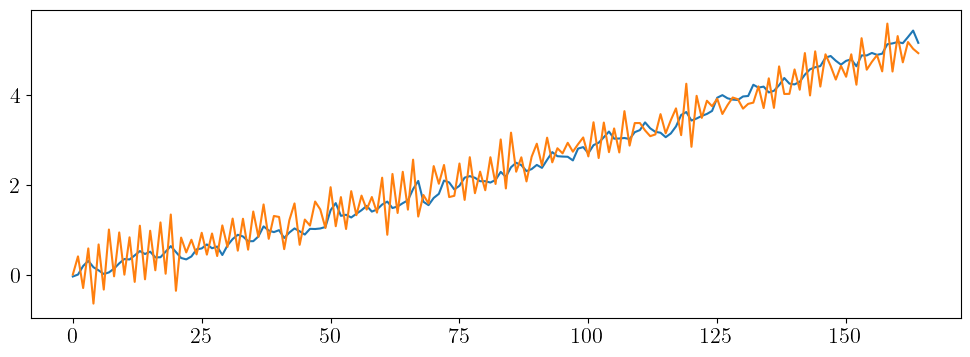

In [12]:
L = utils_general.calc_L_direct_1D(T, F, t, (0,len(t)), 1, 1, modal=False, g=None)
T_est_raw = utils_general.reconstruct_T(F, 1, t, L, 0, 1)

print(np.linalg.norm(T - T_est_raw))
plt.plot(tas_1pct_global_anomaly_1pct_annual_ds)
plt.plot(T_est_raw)

#### Method 3: Deconvolution

0.0007183731389983079


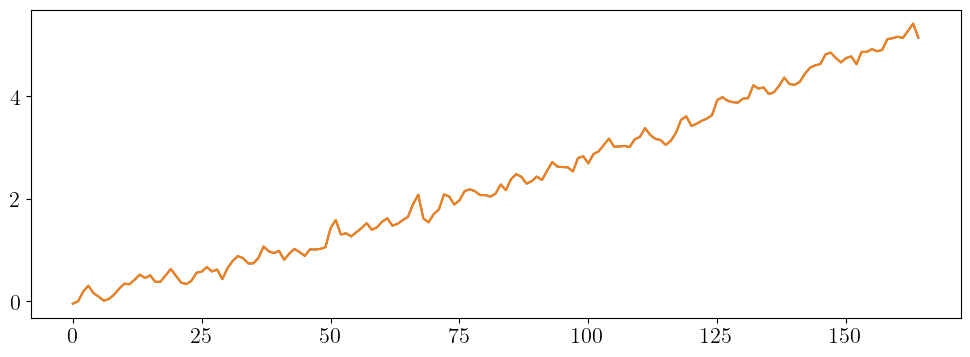

In [49]:
from scipy.linalg import toeplitz
G_deconv = utils_general.calc_G_deconv_2D(T, F, dt=1)

F_toeplitz = toeplitz(F, np.zeros_like(F))
T_est_deconv = (G_deconv) @ F_toeplitz.T

print(np.linalg.norm(T - T_est_deconv))
plt.plot(tas_1pct_global_anomaly_1pct_annual_ds)
plt.plot(T_est_deconv)

#### Method 4: Best fit

In [81]:
from scipy.optimize import minimize
initial_guess = np.array([1, 1])
t_range = np.arange(t[-1] - t[0] + 1)
res_raw = minimize(utils_general.opt_h_lam_1D,
                                  initial_guess,
                                  args=(T, F, t_range, 1))

G_fit = utils_general.apply_response_1D(res_raw.x, t_range)

1.5075891054932022


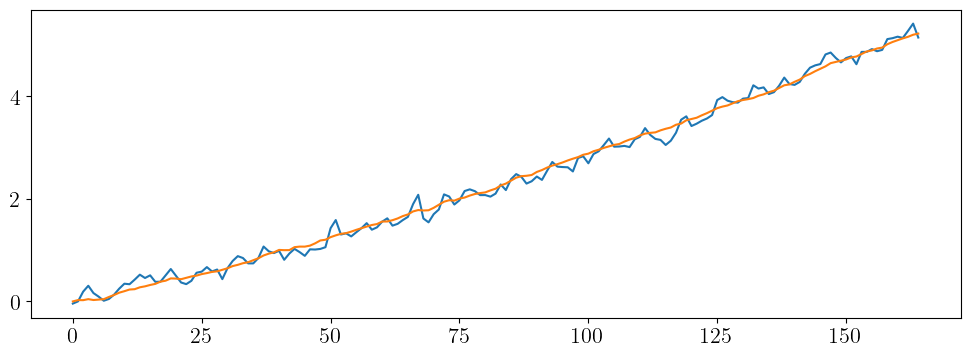

In [84]:
T_est_fit = (G_fit) @ F_toeplitz.T
print(np.linalg.norm(T - T_est_fit))
plt.plot(tas_1pct_global_anomaly_1pct_annual_ds)
plt.plot(T_est_fit.T)

## Spatial Data